Introdução

---


Structured Query Language, ou SQL, é a linguagem de programação usada com bancos de dados e é uma habilidade importante para qualquer cientista de dados. Neste curso, você desenvolverá suas habilidades em SQL usando o BigQuery, um serviço da Web que permite aplicar SQL a grandes conjuntos de dados.

Nesta lição, aprenderemos os conceitos básicos de como acessar e examinar conjuntos de dados do BigQuery. Depois de entender esses conceitos básicos, voltaremos para desenvolver suas habilidades em SQL.

Seus primeiros comandos do BigQuery

---



Para usar o BigQuery, importaremos o pacote Python abaixo:

In [21]:
from google.cloud import bigquery

A primeira etapa no fluxo de trabalho é criar um objeto Cliente. Como você verá em breve, esse objeto Client desempenhará um papel central na recuperação de informações dos conjuntos de dados do BigQuery.

In [28]:
# Create a "Client" object
client = bigquery.Client()

Usando a integração do BigQuery do conjunto de dados público do Kaggle.

---


Trabalharemos com um conjunto de dados de crimes em Chicago.

No BigQuery, cada conjunto de dados está contido em um projeto correspondente. Nesse caso, nosso conjunto de dados chicago_crimes está contido no projeto bigquery-public-data. Para acessar o conjunto de dados,

Começamos construindo uma referência ao conjunto de dados com o método dataset().
Em seguida, usamos o método get_dataset(), junto com a referência que acabamos de construir, para buscar o conjunto de dados.

In [29]:

# Construct a reference to the "chicago_crime" dataset
dataset_ref = client.dataset("chicago_crime", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)

RefreshError: ignored

Cada conjunto de dados é apenas uma coleção de tabelas. Você pode pensar em um conjunto de dados como um arquivo de planilha contendo várias tabelas, todas compostas por linhas e colunas.

Usamos o método list_tables() para listar as tabelas no conjunto de dados.

In [ ]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)

* comments
* full
* full_201510
* stories

Semelhante à forma como buscamos um conjunto de dados, podemos buscar uma tabela. Na célula de código abaixo, buscamos a tabela completa no conjunto de dados hacker_news.

In [19]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

Na próxima seção, vamos explorar o conteúdo dessa tabela com mais detalhes. Por enquanto, aproveite para usar a imagem abaixo para consolidar o que você aprendeu até agora.

first_commands

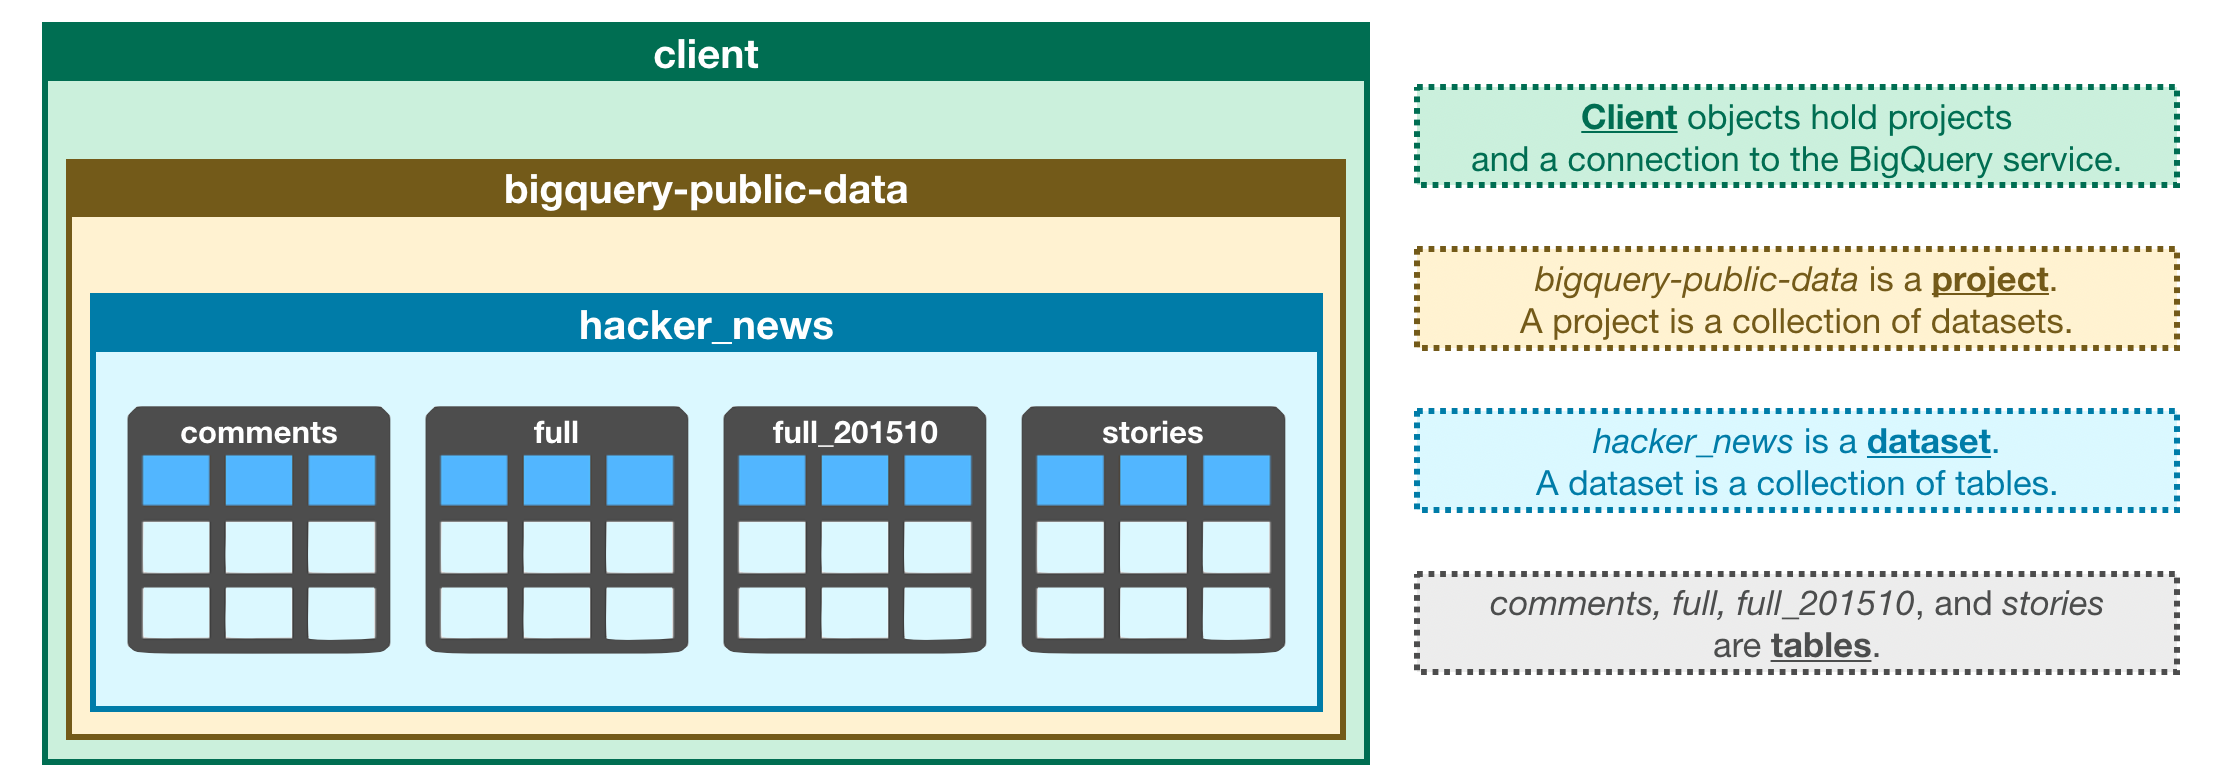

Esquema da tabela

---


A estrutura de uma tabela é chamada de esquema. Precisamos entender o esquema de uma tabela para extrair efetivamente os dados que queremos.

Neste exemplo, investigaremos a tabela completa que buscamos acima.

In [ ]:
# Print information on all the columns in the "full" table in the "hacker_news" dataset
table.schema

Cada SchemaField nos informa sobre uma coluna específica (que também chamamos de campo). Em ordem, as informações são:

* O nome da coluna
* O tipo de campo (ou tipo de dados) na coluna
* O modo da coluna ('NULLABLE' significa que uma coluna permite valores NULL e é o padrão)
* Uma descrição dos dados nessa coluna
* O primeiro campo tem o SchemaField:

SchemaField('by', 'string', 'NULLABLE', "O nome de usuário do autor do item.",())

Isso nos diz:

* o campo (ou coluna) é chamado por,
* os dados neste campo são strings,
* Valores NULL são permitidos e contém os nomes de usuário correspondentes ao autor de cada item.

Podemos usar o método list_rows() para verificar apenas as primeiras cinco linhas da tabela completa para ter certeza de que está correto. (Às vezes, os bancos de dados têm descrições desatualizadas, portanto, é bom verificar.) Isso retorna um objeto RowIterator do BigQuery que pode ser convertido rapidamente em um DataFrame pandas com o método to_dataframe().

In [ ]:
# Preview the first five lines of the "full" table
client.list_rows(table, max_results=5).to_dataframe()

O método list_rows() também nos permitirá ver apenas as informações em uma coluna específica. Se quisermos ver as primeiras cinco entradas na coluna por, por exemplo, podemos fazer isso!

In [ ]:
# Preview the first five entries in the "by" column of the "full" table
client.list_rows(table, selected_fields=table.schema[:1], max_results=5).to_dataframe()